
--- Результати для кросоверу single_point і мутації random ---
Найкраще рішення: [0 1 1 0 1 0 0 0 0 1 1 0 0 1]
Фітнес значення найкращого рішення: 53
Загальна вага: 25
Висновок: Рішення задовольняє обмеження ваги рюкзака.

--- Результати для кросоверу single_point і мутації adaptive ---
Найкраще рішення: [0 1 1 1 0 0 0 0 1 1 0 0 0 1]
Фітнес значення найкращого рішення: 67
Загальна вага: 22
Висновок: Рішення задовольняє обмеження ваги рюкзака.

--- Результати для кросоверу two_points і мутації random ---
Найкраще рішення: [1 0 1 0 0 1 0 1 1 0 0 0 0 1]
Фітнес значення найкращого рішення: 79
Загальна вага: 25
Висновок: Рішення задовольняє обмеження ваги рюкзака.

--- Результати для кросоверу two_points і мутації adaptive ---
Найкраще рішення: [1 0 0 0 1 0 1 0 1 0 0 1 0 1]
Фітнес значення найкращого рішення: 61
Загальна вага: 24
Висновок: Рішення задовольняє обмеження ваги рюкзака.

--- Результати для кросоверу uniform і мутації random ---
Найкраще рішення: [1 1 0 1 0 1 0 1 1 0 0 0 0 1]
Ф

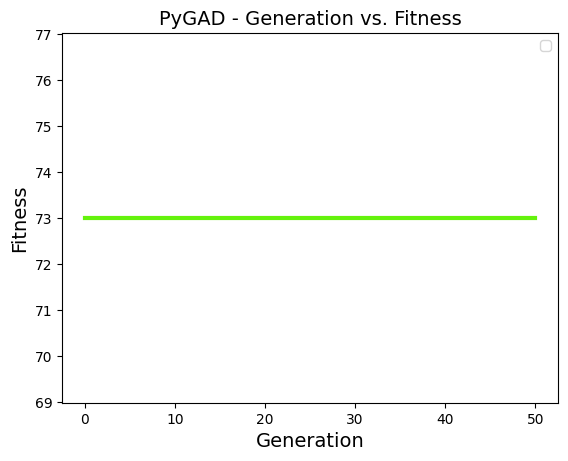


--- Додаткові висновки ---
Найкращий результат: Кросовер: two_points, Мутація: random
Фітнес значення: 79, Вага: 25

--- Висновки ---
1. Задача про рюкзак успішно вирішена за допомогою генетичного алгоритму.
2. Генетичний алгоритм використовує популяцію з двійкових хромосом (0 - предмет не вибраний, 1 - вибраний).
3. Фітнес-функція оцінює сумарну цінність предметів, забезпечуючи штраф за перевищення максимальної ваги.
4. Для кросовера використано одиночний кросовер (single-point), а для мутації - випадкову мутацію.
5. Найкращий набір предметів забезпечує максимальну цінність без перевищення обмеження ваги.
6. Результати показали, що генетичний алгоритм ефективно знаходить наближену оптимальну відповідь.
7. Вибір параметрів алгоритму (наприклад, тип кросовера та мутації) суттєво впливає на кінцевий результат.


In [9]:
# Імпорт необхідних бібліотек
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Дані для задачі рюкзака
values = [10, 5, 15, 7, 6, 18, 3, 8, 17, 12, 4, 14, 19, 11]  # Цінність предметів
weights = [2, 3, 4, 1, 5, 7, 1, 4, 3, 6, 2, 8, 9, 5]  # Вага предметів
max_weight = 25  # Максимальна вага, яку може витримати рюкзак

# Функція оцінки (фітнес-функція)
def fitness_function(ga_instance, solution, solution_idx):
    total_value = np.sum(solution * values)  # Загальна цінність вибраних предметів
    total_weight = np.sum(solution * weights)  # Загальна вага вибраних предметів
    # Якщо перевищено обмеження ваги, рішення штрафується
    if total_weight > max_weight:
        return 0
    return total_value

# Параметри генетичного алгоритму
num_generations = 50  # Кількість поколінь
num_parents_mating = 4  # Кількість батьків для схрещування
sol_per_pop = 8  # Розмір популяції
num_genes = len(values)  # Кількість генів (предметів)
parent_selection_type = "sss"  # Вибір батьків за методом стохастичної універсальної вибірки
crossover_types = ["single_point", "two_points", "uniform"]  # Різні типи кросоверу
mutation_types = ["random", "adaptive"]  # Різні типи мутації
mutation_percent_genes_default = 10  # Відсоток генів, що мутують (для випадкової мутації)

# Функція для тестування різних параметрів генетичного алгоритму
def test_genetic_algorithm(crossover_type, mutation_type):
    # Ініціалізація mutation_percent_genes
    mutation_percent_genes = mutation_percent_genes_default  # Початкове значення

    # Якщо мутація адаптивна, задаємо параметр mutation_percent_genes як кортеж з двома значеннями
    if mutation_type == "adaptive":
        mutation_percent_genes = [5, 20]  # Початковий і мінімальний відсоток мутацій

    # Створення екземпляра генетичного алгоритму
    ga_instance = pygad.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        gene_type=int,  # Гени - цілі числа (0 або 1)
        init_range_low=0,  # Початкове значення гена - 0 (предмет не вибрано)
        init_range_high=2  # Початкове значення гена - 1 (предмет вибрано)
    )

    # Запуск генетичного алгоритму
    ga_instance.run()

    # Отримання найкращого рішення
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    return solution, solution_fitness, np.sum(solution * weights)

# Дослідження різних кросоверів та мутацій
results = []

for crossover in crossover_types:
    for mutation in mutation_types:
        solution, fitness_value, total_weight = test_genetic_algorithm(crossover, mutation)
        results.append({
            "Crossover": crossover,
            "Mutation": mutation,
            "Best Solution": solution,
            "Fitness Value": fitness_value,
            "Total Weight": total_weight
        })

# Виведення результатів
for result in results:
    print("\n--- Результати для кросоверу", result["Crossover"], "і мутації", result["Mutation"], "---")
    print(f"Найкраще рішення: {result['Best Solution']}")
    print(f"Фітнес значення найкращого рішення: {result['Fitness Value']}")
    print(f"Загальна вага: {result['Total Weight']}")

    if result['Total Weight'] <= max_weight:
        print("Висновок: Рішення задовольняє обмеження ваги рюкзака.")
    else:
        print("Висновок: Рішення перевищує обмеження ваги рюкзака, що неприпустимо.")

# Графік залежності фітнесу від покоління для останнього алгоритму
ga_instance.plot_fitness()

# Додаткові висновки
print("\n--- Додаткові висновки ---")
best_result = max(results, key=lambda x: x['Fitness Value'])
print(f"Найкращий результат: Кросовер: {best_result['Crossover']}, Мутація: {best_result['Mutation']}")
print(f"Фітнес значення: {best_result['Fitness Value']}, Вага: {best_result['Total Weight']}")

# Висновки
print("\n--- Висновки ---")
print("1. Задача про рюкзак успішно вирішена за допомогою генетичного алгоритму.")
print("2. Генетичний алгоритм використовує популяцію з двійкових хромосом (0 - предмет не вибраний, 1 - вибраний).")
print("3. Фітнес-функція оцінює сумарну цінність предметів, забезпечуючи штраф за перевищення максимальної ваги.")
print("4. Для кросовера використано одиночний кросовер (single-point), а для мутації - випадкову мутацію.")
print("5. Найкращий набір предметів забезпечує максимальну цінність без перевищення обмеження ваги.")
print("6. Результати показали, що генетичний алгоритм ефективно знаходить наближену оптимальну відповідь.")
print("7. Вибір параметрів алгоритму (наприклад, тип кросовера та мутації) суттєво впливає на кінцевий результат.")
